In [34]:
import csv

# 큰수와 index 번호를 담은 list를 세개 반환(가장 큰거 처음 나옴)
def find_top3_largest(row):
    first_list = [] # 큰수, index 번호를 담음
    second_list = []
    thrid_list = []
    
    first_larger = 0;
    second_larger = 0;
    third_larger = 0;
    
    first_larger_idx, second_larger_idx, third_larger_idx = None, None, None
    for i in range(3,14):
        if first_larger == 0:
            first_larger = float(row[i])
            first_larger_idx = i
        else:
            if i > first_larger:
                second_larger = first_larger
                second_larger_idx = first_larger_idx
                first_larger = float(row[i])
                first_larger = i
            else:
                if i> second_larger:
                    third_larger = second_larger
                    third_larger_idx = second_larger_idx
                    second_larger = float(row[i])
                    second_larger_idx = i
                else:
                    if i > third_larger:
                        third_larger = float(row[i])
                        third_larger_idx = i
        
    first_list.append(first_larger)
    first_list.append(first_larger_idx)
    second_list.append(second_larger)
    second_list.append(second_larger_idx)
    thrid_list.append(third_larger)
    thrid_list.append(third_larger_idx)    
    
    return first_list, second_list, thrid_list


f = open(r'.\평생학습_불참요인_20220607161957.csv','r',encoding='cp949') # relative path, enconding = window encoding.
data = csv.reader(f, delimiter = ',' )

header = next(data)
print(header) # []은 list 타입이고 ''은 str을 의미함.

total_reason_top3 = [] # 전체 종합 이유 
men_reason_top3 = [] # 남성
women_reason_top3 = [] # 여성
for row in data:
    if(row[0] == '전체'):
        total_top1, total_top2, total_top3 = find_top3_largest(row)
        # print(total_top1, total_top2, total_top3)
        total_reason_top3.append([header[total_top1[1]] ,float(total_top1[0])])
        total_reason_top3.append([header[total_top2[1]] ,float(total_top2[0])])
        total_reason_top3.append([header[total_top3[1]] ,float(total_top3[0])])
    elif(row[1] == '남성'):
        total_top1, total_top2, total_top3 = find_top3_largest(row)
        
        men_reason_top3.append([header[total_top1[1]] ,float(total_top1[0])])
        men_reason_top3.append([header[total_top2[1]] ,float(total_top2[0])])
        men_reason_top3.append([header[total_top3[1]] ,float(total_top3[0])])
    elif(row[1] == '여성'):
        total_top1, total_top2, total_top3 = find_top3_largest(row)
        
        women_reason_top3.append([header[total_top1[1]] ,float(total_top1[0])])
        women_reason_top3.append([header[total_top2[1]] ,float(total_top2[0])])
        women_reason_top3.append([header[total_top3[1]] ,float(total_top3[0])])
        
print(total_reason_top3)
print(men_reason_top3)
print(women_reason_top3)


f.close()

['특성별(1)', '특성별(2)', '참여하지 못한 평생학습프로그램 있었음', '직장업무로 인한 시간 부족', '코로나 영향', '가까운 거리에 교육훈련기관이 없어서', '동기, 자신감 부족', '가족부양에 따른 시간 부족', '교육에 대한 정보가 부족해서', '학습비가 너무 비싸서', '함께 배울 친구가 없어서', '교육시설이 만족스럽지 못해서', '건강상 이유로', '교육내용이 만족스럽지 못해서', '기타']
[['직장업무로 인한 시간 부족', 40.3], ['코로나 영향', 29.0], ['가까운 거리에 교육훈련기관이 없어서', 18.6]]
[['직장업무로 인한 시간 부족', 55.5], ['코로나 영향', 21.0], ['가까운 거리에 교육훈련기관이 없어서', 18.7]]
[['직장업무로 인한 시간 부족', 30.4], ['코로나 영향', 34.2], ['가까운 거리에 교육훈련기관이 없어서', 18.5]]


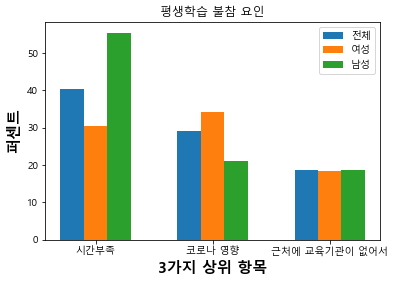

In [86]:
import matplotlib.pyplot as plt
import numpy as np
#total_reason_top3 = [] # 전체 종합 이유 
#men_reason_top3 = [] # 남성
#women_reason_top3 = [] # 여성
# 이름 모음 [total_reason_top3[0][0], total_reason_top3[1][0], total_reason_top3[2][0]]
plt.title('평생학습 불참 요인')
barWidth = 0.2
plt.plot(figsize=(15,10))

total_data = [total_reason_top3[0][1], total_reason_top3[1][1], total_reason_top3[2][1]]
women_data = [women_reason_top3[0][1], women_reason_top3[1][1], women_reason_top3[2][1]]
men_data = [men_reason_top3[0][1], men_reason_top3[1][1], men_reason_top3[2][1]]

# set position of bar on X axis
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, total_data, width = barWidth, label='전체')
plt.bar(br2, women_data, width = barWidth, label = '여성')
plt.bar(br3, men_data, width = barWidth, label = '남성')

plt.xlabel("3가지 상위 항목",fontweight = 'bold', fontsize = 15)
plt.ylabel("퍼센트", fontweight = 'bold', fontsize = 15)
# luck.. 3가지 상위 항목이 동일함.
plt.xticks([r + barWidth for r in range(3)], ['시간부족','코로나 영향','근처에 교육기관이 없어서'])

plt.legend()
plt.show()